In [63]:
import wave
import json
import librosa
import csv
import numpy as np
from pywt import wavedec
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [64]:
model_uri = '../modelh5/model_cnn_nontuning.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 110, 64)           256       
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 55, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 53, 32)            6176      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 27, 32)            0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 864)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

In [65]:
# import wave
# import json
# header = 'filename'
# for i in range(1, 41):
#     header += f' mfcc{i}'
# for i in range(1, 13):
#   header += f' chroma{i}'
# for i in range(1, 61):
#   header += f' cqt{i}'
# header += ' label'
# header = header.split()
# file = open('testing.csv', 'w', newline='')
# with file:
#     writer = csv.writer(file)
#     writer.writerow(header)



In [66]:
# dataset_path = '../data/testing_10/'

In [67]:
# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#             semantic_label = dirpath.split("/")[-1]
#             print("\nProcessing: {}".format(semantic_label))
#             for f in filenames:
#                 file_path = os.path.join(dirpath, f)
#                 to_append = f'{file_path}'
#                 # print(file_path)
#                 y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#                 coeffs = wavedec(y, 'db1', level=10)
#                 cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
#                 mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#                 rms = librosa.feature.chroma_stft(y=cD1, sr=8000)
#                 cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60))
#                 combined_features = np.concatenate((mfcc, rms, cqt), axis=0)
#                 to_append = f'{file_path}'
#                 for e in combined_features:
#                     to_append += f' {np.mean(e.T, axis=0)}'
#                 to_append += f' {semantic_label}'
#                 file = open('testing.csv', 'a', newline='')
#                 with file:
#                     writer = csv.writer(file)
#                     writer.writerow(to_append.split())




In [68]:
data = pd.read_csv('./testing.csv')
data.head()

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/testing_10/MVP/New_MVP_135.wav,-409.528564,87.384094,26.037184,-19.667170,-30.942360,-22.674948,-22.804028,-23.051409,-34.245644,...,0.002009,0.001601,0.001465,0.001038,0.000982,0.000833,0.000616,0.000510,0.000491,MVP
1,../data/testing_10/MVP/New_MVP_192.wav,-337.002411,89.271080,14.186399,1.686405,-6.657608,-13.926779,-20.226974,-19.441204,-17.915880,...,0.002848,0.002626,0.003480,0.003186,0.003180,0.002202,0.001917,0.002559,0.002665,MVP
2,../data/testing_10/MVP/New_MVP_179.wav,-407.230621,70.930885,-13.684482,-34.369339,-21.889259,-15.245199,-11.328670,-9.168187,-16.146969,...,0.004742,0.004964,0.003947,0.003980,0.003126,0.003334,0.002728,0.002642,0.002220,MVP
3,../data/testing_10/MVP/New_MVP_165.wav,-406.872314,84.138229,27.318718,-15.585702,-28.959631,-22.787647,-22.402174,-23.848078,-31.116653,...,0.003096,0.002835,0.002835,0.002727,0.002162,0.001437,0.000839,0.000807,0.000667,MVP
4,../data/testing_10/MVP/New_MVP_024.wav,-479.023804,89.486000,8.549840,-0.640211,-7.605422,-15.150332,-16.487503,-13.620892,-10.753409,...,0.002732,0.001242,0.000721,0.001375,0.002052,0.002141,0.001541,0.000922,0.001057,MVP


In [69]:
X = data.drop(['label', 'filename'], axis=1)
y = data.iloc[:, -1]

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model = tf.keras.models.load_model(model_uri)
pred = model.predict(X)
hasil = []
class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
# class_labels = ['MVP', 'MS', 'N', 'MR', 'AS']
for i in pred:
    # hasil.append(np.argmax(i))
    print('===')
    print(i)
    cek = np.argmax(i)
    print(f'Actual class: {cek}')
    print(f'Predicted class: {class_labels[cek]}')
    print('===')
    hasil.append(class_labels[cek])
y_p = np.argmax(pred, axis=1)


4/4 [==============================] - 0s 2ms/step
===
[5.83058782e-03 5.17545687e-03 9.87473060e-04 9.87892270e-01
 1.14203096e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.40595257 0.18199058 0.32733965 0.04486096 0.03985636]
Actual class: 0
Predicted class: AS
===
===
[0.44826865 0.37168804 0.00959182 0.16985047 0.00060106]
Actual class: 0
Predicted class: AS
===
===
[1.1489136e-02 9.0221800e-03 1.3321816e-03 9.7787994e-01 2.7653232e-04]
Actual class: 3
Predicted class: MVP
===
===
[0.01938443 0.0010674  0.01756942 0.25182152 0.71015733]
Actual class: 4
Predicted class: N
===
===
[1.1484143e-03 1.2583740e-03 4.7142856e-04 9.9708533e-01 3.6369449e-05]
Actual class: 3
Predicted class: MVP
===
===
[5.9826918e-02 6.5746688e-04 1.6341424e-02 9.0095603e-01 2.2218058e-02]
Actual class: 3
Predicted class: MVP
===
===
[3.8265439e-03 1.9489984e-03 7.1556610e-04 9.9345618e-01 5.2735493e-05]
Actual class: 3
Predicted class: MVP
===
===
[0.01981999 0.00134014 0.09959202 0.56574607 0.31350

In [71]:
cm = confusion_matrix(y, hasil)
cm

array([[20,  0,  0,  0,  0],
       [ 8, 11,  1,  0,  0],
       [ 4,  1, 15,  0,  0],
       [ 3,  0,  0, 15,  2],
       [ 0,  0,  1,  0, 19]])

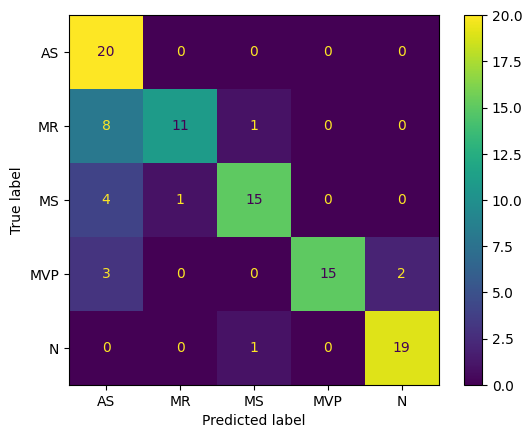

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [73]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [74]:
print("Sensitivity :" , TPR, 'mean: ', np.mean(TPR))
print("Specificity :" , TNR, 'mean: ', np.mean(TNR))
print("Precision :" , PPV, 'mean: ', np.mean(PPV))
print("Accuracy :" , ACC, 'mean: ', np.mean(ACC))
print("FPR :" , FPR, 'mean: ', np.mean(FPR))
print("FNR :" , FNR, 'mean: ', np.mean(FNR))
print("NPV :" , NPV, 'mean: ', np.mean(NPV))
print("FDR :" , FDR, 'mean: ', np.mean(FDR))
print("f1_score:", 2 * (PPV * TPR) / (PPV + TPR), 'mean: ', np.mean(2 * (PPV * TPR) / (PPV + TPR)))


Sensitivity : [1.   0.55 0.75 0.75 0.95] mean:  0.8
Specificity : [0.8125 0.9875 0.975  1.     0.975 ] mean:  0.95
Precision : [0.57142857 0.91666667 0.88235294 1.         0.9047619 ] mean:  0.8550420168067226
Accuracy : [0.85 0.9  0.93 0.95 0.97] mean:  0.9199999999999999
FPR : [0.1875 0.0125 0.025  0.     0.025 ] mean:  0.05
FNR : [0.   0.45 0.25 0.25 0.05] mean:  0.2
NPV : [1.         0.89772727 0.93975904 0.94117647 0.98734177] mean:  0.9532009103223971
FDR : [0.42857143 0.08333333 0.11764706 0.         0.0952381 ] mean:  0.1449579831932773
f1_score: [0.72727273 0.6875     0.81081081 0.85714286 0.92682927] mean:  0.8019111327038158
